# Curso de CNN con PyTorch

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## 1) 🎯 Funciones de Activación



Las funciones de activación introducen **no linealidad** en la red neuronal.

Esto permite a las redes aprender relaciones complejas entre las variables de entrada y salida.

## 2) 📐 Fundamento Matemático

Dada una entrada \( x \), una función de activación \( f(x) \) transforma ese valor de forma no lineal:

**ReLU:**

$$
f(x) = \max(0, x)
$$

**Sigmoid:**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Tanh:**

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

## 3) 🧪 Ejemplos



In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms as T

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# 📷 Imagen 1: Gradiente
gradient = np.tile(np.linspace(-1, 1, 64), (64, 1))
img_grad = torch.tensor(gradient, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)

# 📷 Imagen 2: P en píxeles
P_img = np.zeros((64, 64))
## Parte vertical
P_img[10:50, 10:20] = 1
## Parte superior del círculo de la P
P_img[10:20, 10:40] = 1
## Parte media horizontal de la P
P_img[30:40, 10:40] = 1
## Borde derecho del "círculo"
P_img[20:30, 30:40] = 1
## Parte interior para que no parezca una B
P_img[20:30, 20:30] = 0  # vaciar la parte interior
img_P = torch.tensor(P_img, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)

# 📷 Imagen 3: Imagen RGB subida por el usuario
def load_user_image(path):
    image = Image.open(path).convert('RGB')
    transform = T.Compose([
        T.Resize((64, 64)),
        T.ToTensor()
    ])
    return transform(image).unsqueeze(0).to(device)

In [4]:
# Funciones de activación
activations = {
    'ReLU': F.relu,
    'Sigmoid': torch.sigmoid,
    'Tanh': torch.tanh
}

In [5]:
# Visualizaciones
def visualize_activation(img, title):
    plt.figure(figsize=(16, 4))

    # Imagen original (primera posición)
    img_np = img.squeeze().detach().cpu().numpy()
    if img_np.ndim == 3:
        img_np = np.transpose(img_np, (1, 2, 0))
    else:
        img_np = img_np.squeeze()

    plt.subplot(1, len(activations) + 1, 1)
    plt.imshow(img_np, cmap='gray' if img_np.ndim == 2 else None)
    plt.title('Original')
    plt.axis('off')

    # Resto de activaciones
    for i, (name, fn) in enumerate(activations.items()):
        out = fn(img)
        out_np = out.squeeze().detach().cpu().numpy()
        if out_np.ndim == 3:  # RGB
            out_np = np.transpose(out_np, (1, 2, 0))
        else:  # grayscale
            out_np = out_np.squeeze()

        plt.subplot(1, len(activations) + 1, i + 2)
        plt.imshow(out_np, cmap='gray' if out_np.ndim == 2 else None)
        plt.title(name)
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

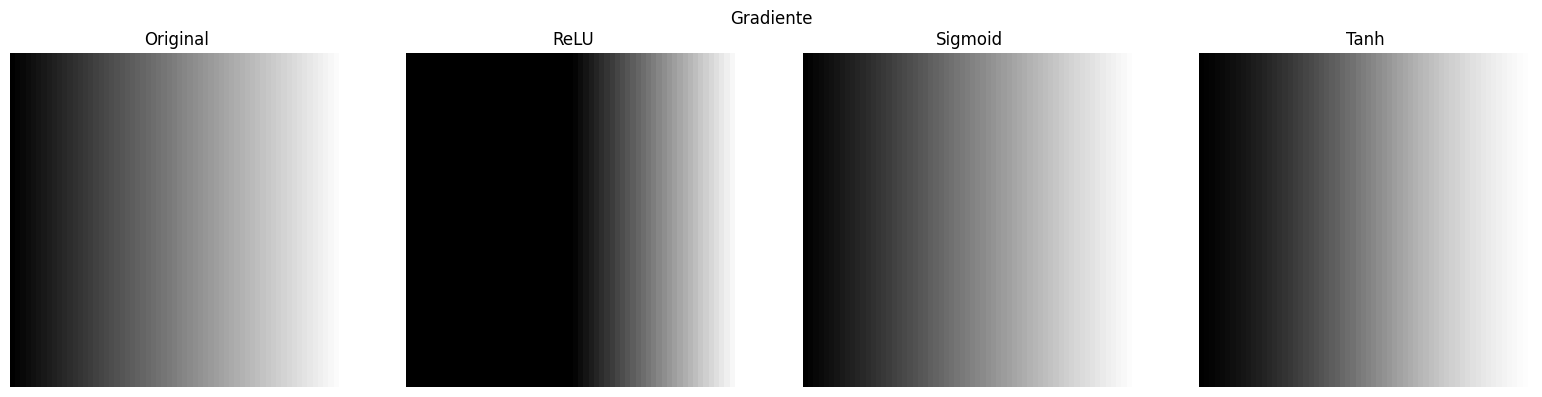

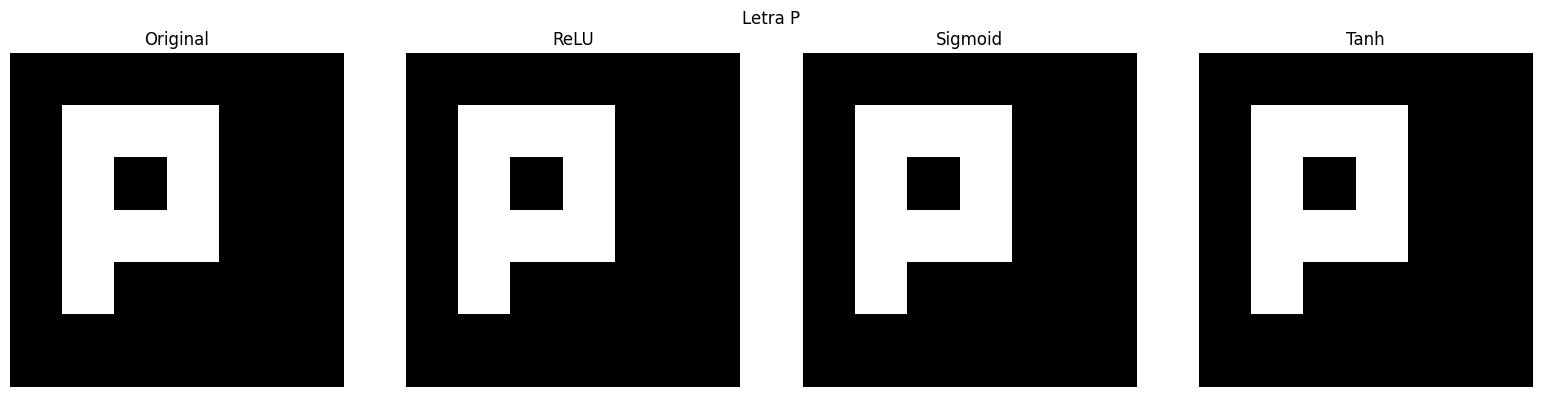

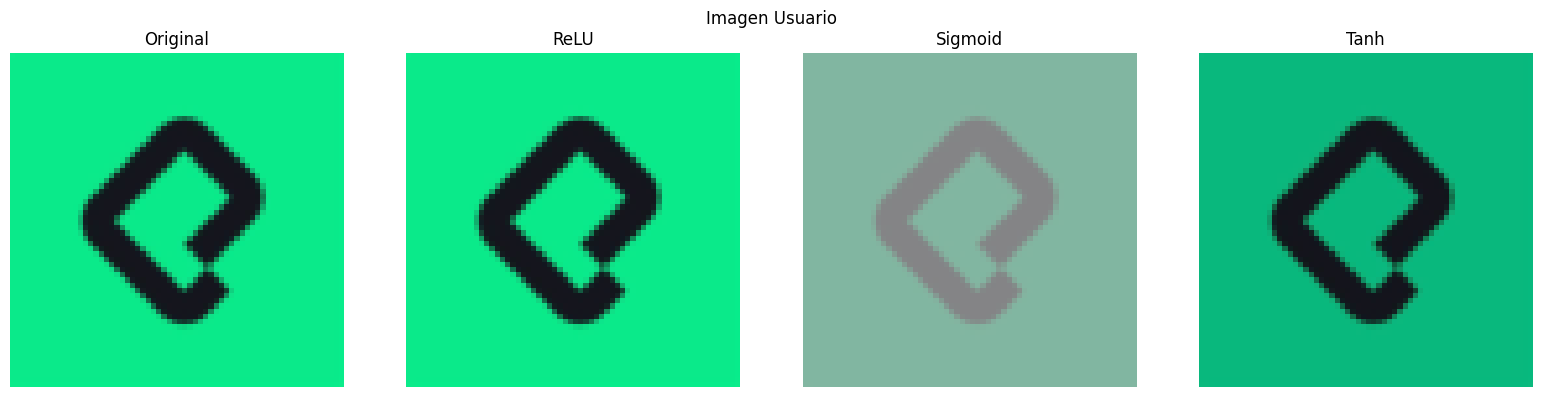

In [6]:
# Visualizar cada imagen
visualize_activation(img_grad, "Gradiente")
visualize_activation(img_P, "Letra P")

# Para probar con una imagen tuya:
user_img = load_user_image('/content/logo_platzi.jpg')
visualize_activation(user_img, "Imagen Usuario")

## 4) ✅ ¿Cuándo usar cada función?

| Función  | Ventajas | Desventajas | Usos comunes |
|---------|----------|-------------|--------------|
| **ReLU** | Simple, rápida, no satura | Puede dar neuronas muertas (si x < 0 siempre) | Capas ocultas en CNN y MLP |
| **Sigmoid** | Buena interpretación probabilística | Saturación en extremos (gradientes pequeños) | Salidas binarias (clasificación 0/1) |
| **Tanh** | Salida centrada en 0, útil para normalización | También puede saturarse | RNN, capas intermedias |


## 5) 💡 Tips

- ReLU es casi siempre una buena opción por eficiencia y simplicidad.
- Usá `Sigmoid` sólo en la **última capa** si estás haciendo clasificación binaria.
- `Tanh` puede ser útil si tus entradas están normalizadas entre -1 y 1.
- Podés probar variantes como LeakyReLU, ELU o GELU si ReLU te da "muertas".